In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df= pd.read_csv(r"C:\Users\otaku7\Desktop\drug.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,NaN,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NaN,14.020,drugX


In [76]:
df.isnull().sum()

Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           198 non-null    object 
 3   Cholesterol  198 non-null    object 
 4   Na_to_K      199 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [78]:
## warnings
import warnings
warnings.filterwarnings("ignore")


In [79]:
df = df.fillna(df.mean()) 

In [80]:
df = df.apply(lambda col: col.fillna(col.mode().iloc[0]))


In [81]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_ = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)



In [84]:
mapping = {}
for col in df.select_dtypes(include='object').columns:
    mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Sex': {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}, 'BP': {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}, 'Cholesterol': {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}, 'Drug': {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}}


In [85]:
df_

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355000,4
1,47,1,1,0,13.093000,2
2,47,1,1,0,10.114000,2
3,28,0,2,0,16.126126,3
4,61,0,1,0,18.043000,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567000,2
196,16,1,1,0,12.006000,2
197,52,1,2,0,9.894000,3
198,23,1,2,0,14.020000,3


In [156]:
X = df_.drop('Drug', axis = 1)
y=df_['Drug']

In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [169]:
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree (Empty Object)
tr=DecisionTreeClassifier()

#Train the decision tree
tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [170]:
y_pred = tr.predict(x_test)

In [171]:
from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ', tr_acc)

accuracy_score :  0.9666666666666667


Matriz de confusión: 
 [[ 4  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 17]]


<AxesSubplot:>

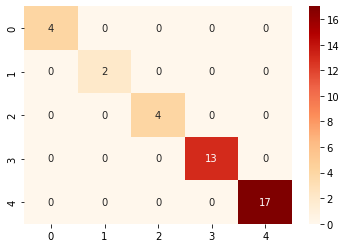

In [162]:
print("Matriz de confusión: \n", confusion_matrix(y_pred, y_test))
cm = np.array(confusion_matrix(y_pred, y_test))
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')

In [150]:
y_pred = drugTree.predict(x_test)

print (y_pred [0:5])

[4 3 4 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have a dataset X and corresponding labels y
# Replace this with your actual dataset and labels

# Sample data
np.random.seed(42)  # Set seed for reproducibility
X = np.random.rand(100, 5)
y = np.random.choice([0, 1], size=100)

# Number of experiments
num_experiments = 5

# Storage for results
tree_sizes = []
accuracies = []

for i in range(num_experiments):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Train a decision tree classifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Get the size of the decision tree (number of nodes)
    tree_size = model.tree_.node_count
    tree_sizes.append(tree_size)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Experiment {i + 1}: Tree Size = {tree_size}, Accuracy = {accuracy}")

# Compare results and select the best model
best_experiment = np.argmax(accuracies)
print(f"\nBest Model (Experiment {best_experiment + 1}):")
print(f"Tree Size: {tree_sizes[best_experiment]}, Accuracy: {accuracies[best_experiment]}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a dataset X and corresponding labels y
# Replace this with your actual dataset and labels

# Sample data
np.random.seed(42)  # Set seed for reproducibility
X = np.random.rand(100, 5)
y = np.random.choice([0, 1], size=100)

# Range of training set sizes (increments of 10%)
training_set_sizes = np.arange(0.3, 0.8, 0.1)

# Number of experiments for each training set size
num_experiments = 5

# Storage for statistics
mean_accuracies = []
max_accuracies = []
min_accuracies = []
mean_tree_sizes = []
max_tree_sizes = []
min_tree_sizes = []

# Iterate over different training set sizes
for training_size in training_set_sizes:
    accuracies = []
    tree_sizes = []

    # Run the experiment with different random seeds
    for i in range(num_experiments):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - training_size, random_state=i)

        # Train a decision tree classifier
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # Get the size of the decision tree (number of nodes)
        tree_size = model.tree_.node_count
        tree_sizes.append(tree_size)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Calculate statistics for each training set size
    mean_accuracies.append(np.mean(accuracies))
    max_accuracies.append(np.max(accuracies))
    min_accuracies.append(np.min(accuracies))
    mean_tree_sizes.append(np.mean(tree_sizes))
    max_tree_sizes.append(np.max(tree_sizes))
    min_tree_sizes.append(np.min(tree_sizes))

# Create a report
report = pd.DataFrame({
    'Training Set Size': training_set_sizes,
    'Mean Accuracy': mean_accuracies,
    'Max Accuracy': max_accuracies,
    'Min Accuracy': min_accuracies,
    'Mean Tree Size': mean_tree_sizes,
    'Max Tree Size': max_tree_sizes,
    'Min Tree Size': min_tree_sizes
})

# Display the report
print("Experiment Report:")
print(report)

# Create plots
plt.figure(figsize=(12, 6))

# Plot 1: Accuracy against Training Set Size
plt.subplot(1, 2, 1)
plt.plot(training_set_sizes, mean_accuracies, label='Mean Accuracy')
plt.fill_between(training_set_sizes, min_accuracies, max_accuracies, alpha=0.2, color='orange', label='Min-Max Accuracy Range')
plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

# Plot 2: Number of Nodes in the Final Tree against Training Set Size
plt.subplot(1, 2, 2)
plt.plot(training_set_sizes, mean_tree_sizes, label='Mean Tree Size', color='green')
plt.fill_between(training_set_sizes, min_tree_sizes, max_tree_sizes, alpha=0.2, color='green', label='Min-Max Tree Size Range')
plt.title('Number of Nodes in the Final Tree vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Number of Nodes')
plt.legend()

plt.tight_layout()
plt.show()


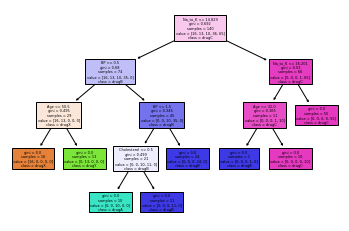

In [116]:
#Now we will visualize the tree graphically
from sklearn import tree
tree.plot_tree(tr, class_names=['drugX','drugY','drugA','drugB','drugC'], filled=True, feature_names=list(df_.columns))
plt.show()